In [4]:
import os, sys
proj_root = "/home/corcasta/projects/pandora_interview"
if proj_root not in sys.path:
    sys.path.insert(0, proj_root)

In [14]:
import torch
from models.tcn import TCNPredictor
import pandas as pd
from pytorch_forecasting.data import NaNLabelEncoder
from pytorch_forecasting import TimeSeriesDataSet

/home/corcasta/miniconda3/envs/farama/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATASET_PATH = proj_root + "/data"

In [7]:
save_model_path = proj_root + "/models/weights/tcn_best.pt"
model = TCNPredictor(input_size=13, seq_len=8, output_size=4).to(DEVICE)
model.load_state_dict(torch.load(save_model_path, weights_only=True))


<All keys matched successfully>

In [17]:
input_features = list(valid_df.columns.drop(["Product_ID", "Total_Amount", "Product_Category", "Time_Unitless"]))
feature_scalers = [None]*len(input_features)
scalers_dict = dict(zip(input_features, feature_scalers))


In [27]:
valid_df = pd.read_csv(DATASET_PATH + "/valid_data.csv")
valid_dataset = TimeSeriesDataSet(
    valid_df,
    time_idx="Time_Unitless",
    target="Total_Amount",
    target_normalizer=None,
    categorical_encoders={"Product_Category": NaNLabelEncoder().fit(valid_df.Product_Category)},
    group_ids=["Product_ID"],
    static_categoricals=["Product_Category"],
    time_varying_unknown_reals=["Total_Amount", *input_features],
    min_encoder_length=8,
    max_encoder_length=8,
    max_prediction_length=4,
    scalers=scalers_dict,
) 

valid_dataloader = valid_dataset.to_dataloader(batch_size=12)



In [73]:
len(valid_df)//4

12

In [65]:
def batch_preprocessing(x, y, batch_first=True):
    x_input = x["encoder_cont"]
    y_input = torch.squeeze(y[0])
    if batch_first == False:
        x_input = x_input.permute([1, 0, 2])
    return x_input.float(), y_input.float()

In [67]:
output = model(x.to(DEVICE))

In [68]:
gt = y.cpu().detach().numpy()

In [69]:
pred = output.cpu().detach().numpy()

0


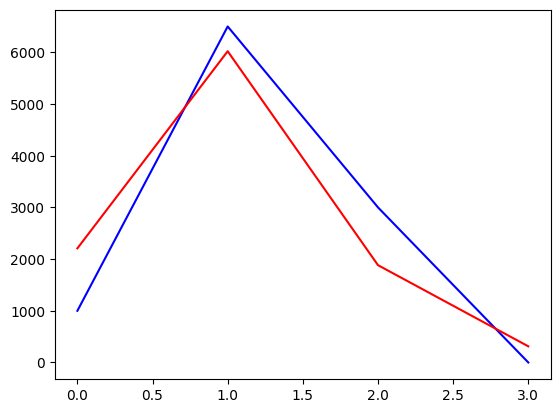

1


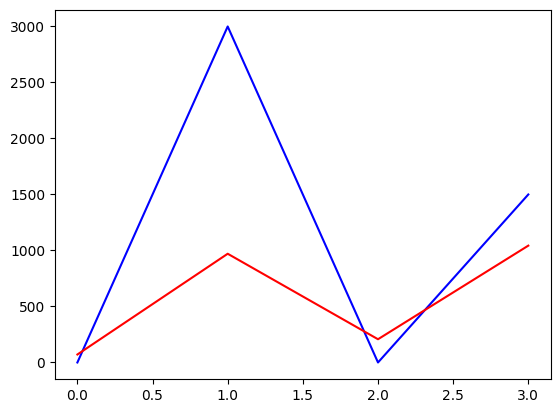

2


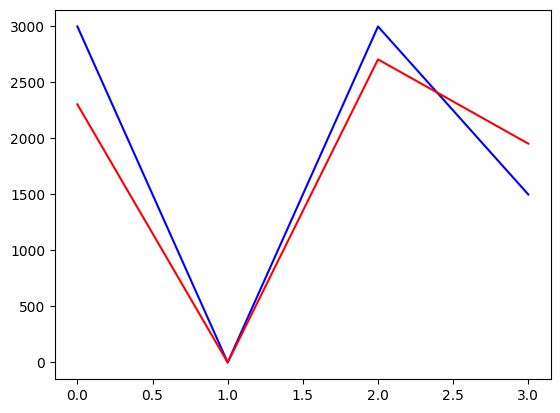

3


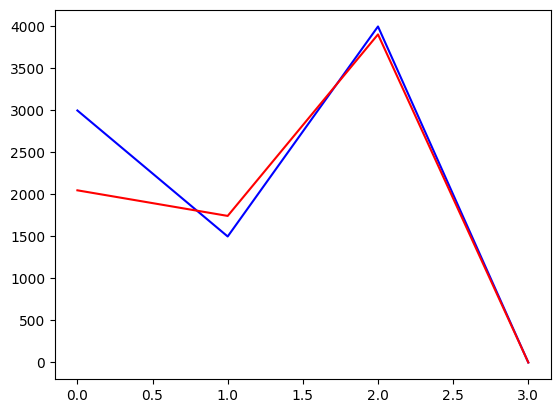

4


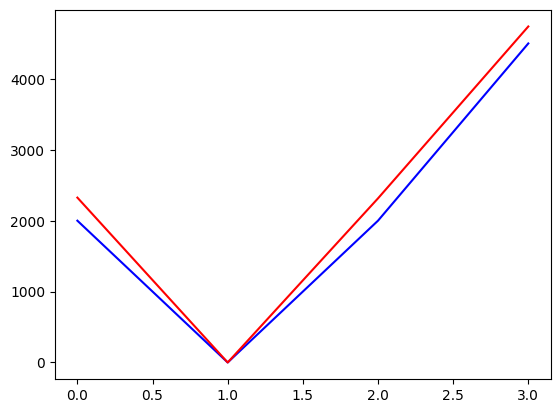

5


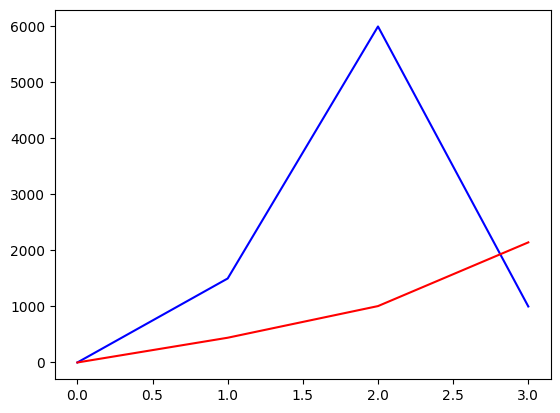

6


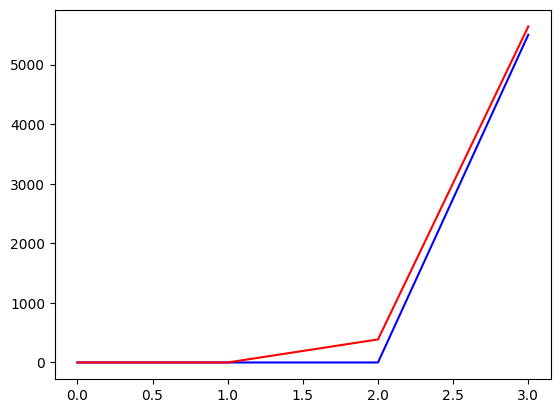

7


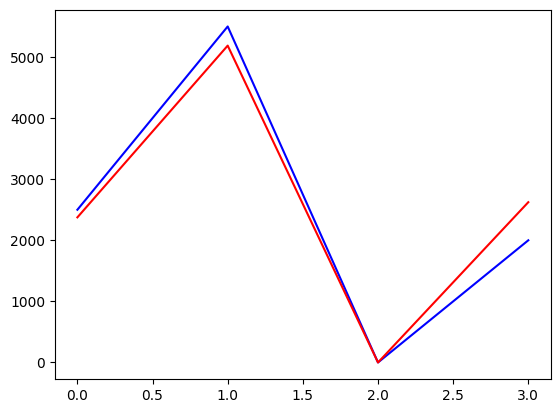

8


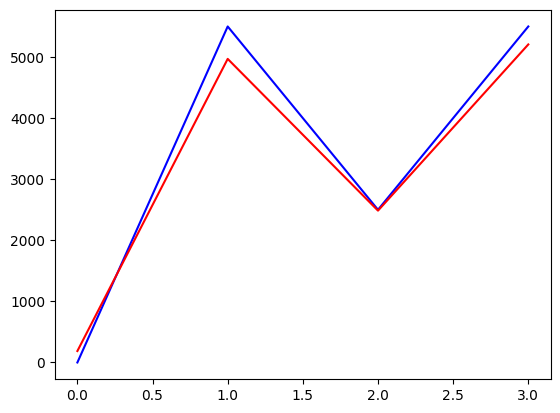

9


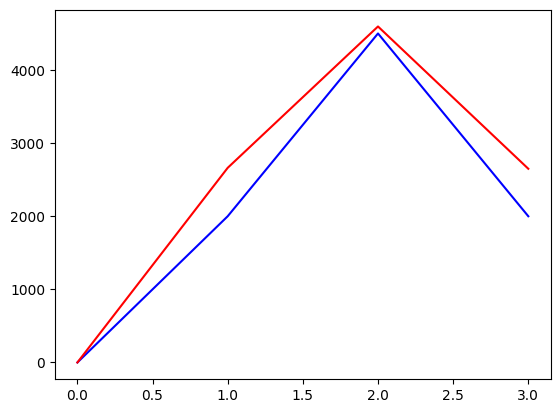

10


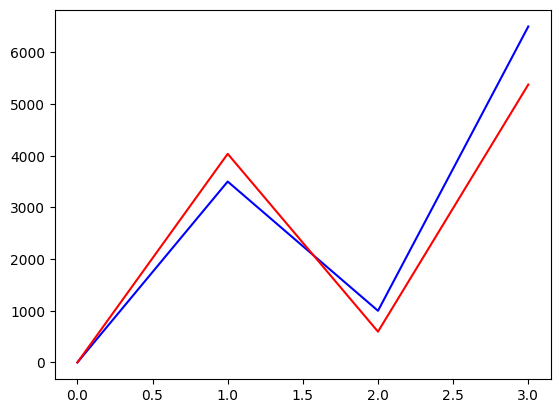

11


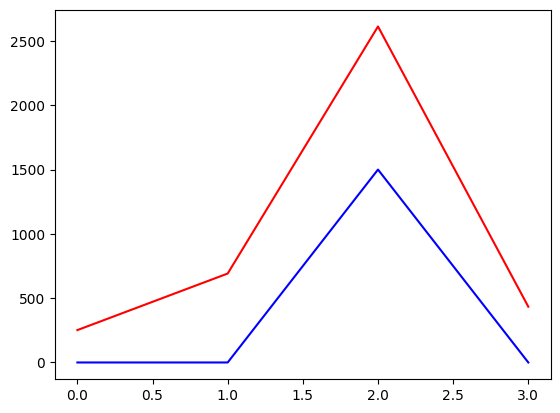

In [70]:
import matplotlib.pyplot as plt

for j in range(12):
    print(j)
    plt.plot([i for i in range(4)], gt[j,:], "b")
    plt.plot([i for i in range(4)], pred[j,:], "r")
    plt.show()

In [92]:
import time

In [149]:
dict(zip(valid_df.dtypes.reset_index()["index"], valid_df.dtypes.reset_index()[0].astype("str")))

{'Age': 'float64',
 'Male': 'int64',
 'Female': 'int64',
 'Quantity': 'int64',
 'Total_Amount': 'int64',
 'Product_ID': 'int64',
 'Product_Category': 'object',
 'Price_per_Unit': 'int64',
 'Time_Unitless': 'int64',
 'Year': 'int64',
 'Month': 'int64',
 'Week': 'int64',
 'Window_Mean_4': 'float64',
 'Window_Mean_5': 'float64',
 'Window_Mean_6': 'float64',
 'Window_Mean_7': 'float64'}

In [151]:
valid_dataset.get_parameters().pop("categorical_encoders")

{'Product_Category': NaNLabelEncoder(add_nan=False, warn=True),
 '__group_id__Product_ID': NaNLabelEncoder(add_nan=False, warn=True)}

In [153]:
type(valid_dataset)

pytorch_forecasting.data.timeseries.TimeSeriesDataSet

In [ ]:
json.dumps()